# Training a CNN on the MNIST Dataset
By Justin Wong

## Imports

In [7]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt

## Loading the mnist database images from and reshaping

In [12]:

batch_size  = 128
num_classes = 10
epoches     = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)
x_test  = x_test.reshape(10000, 28, 28, 1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], ' train samples')
print(x_test.shape[0], ' test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000  train samples
10000  test samples


## Taking a look at the individual images

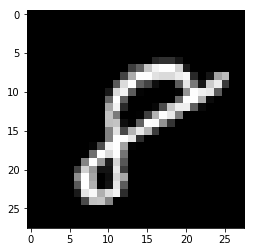

In [24]:
ith_image = 59999 # this number can range from 0 to 59999
img = x_train[ith_image]
img_nparr = np.array(img, dtype='float')
pixels = img_nparr.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

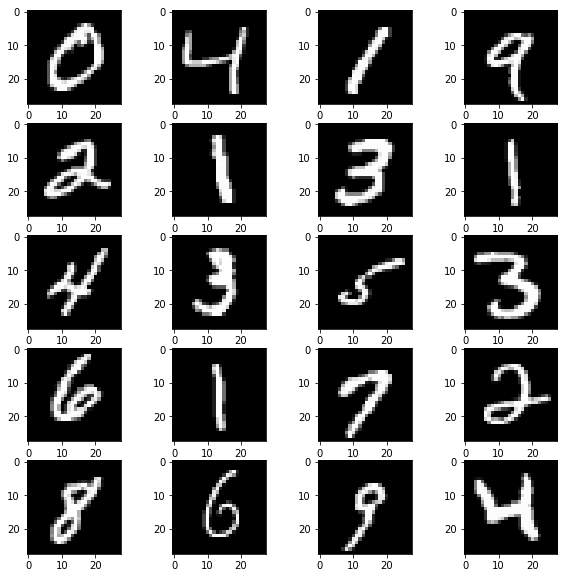

In [33]:

def display_up_to_n_images(n):
    closest_square = round(np.sqrt(n))
    w=closest_square
    h=closest_square+1
    fig=plt.figure(figsize=(10, 10))
    columns = closest_square
    rows = closest_square+1
    for i in range(1, n+1):
        img = x_train[i]
        img_nparr = np.array(img, dtype='float')
        pixels = img_nparr.reshape((28, 28))
        fig.add_subplot(rows, columns, i)
        plt.imshow(pixels, cmap='gray')
    plt.show()
display_up_to_n_images(20)

## Designing the CNN Model

This was adopted from https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

In [4]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)) )
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(.5))
model.add(Dense(num_classes, activation='softmax'))

W0830 14:26:40.762727 4462628288 deprecation_wrapper.py:119] From /Library/Python/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0830 14:26:40.779023 4462628288 deprecation_wrapper.py:119] From /Library/Python/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0830 14:26:40.781516 4462628288 deprecation_wrapper.py:119] From /Library/Python/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0830 14:26:40.815586 4462628288 deprecation_wrapper.py:119] From /Library/Python/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0830 14:26:40.

## Trainiing and Testing the model on multuple epochs

In [ ]:

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=batch_size, epochs=epoches, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss', score[0])
print('Test accuracy', score[1])